In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

# Business Scenario
A fintech company provides instant personal loans through a mobile application.

To reduce risk, the company wants an AI-based decision system that predicts whether a loan should be Approved or Rejected.

## Challenges:
- Customer data is not linearly separable
- Simple linear rules fail
- Decision boundaries may be curved or complex
- The solution must be interactive and deployable
- You are hired as a Machine Learning Engineer to build and deploy this system.
 
1. Load the dataset and study applicant attributes such as:
    - Applicant income
    - Loan amount
    - Credit history
    - Employment status
2. Identify features that may influence loan approval.
3. Build three different SVM models using:
    - Linear kernel
    - Polynomial kernel
    - RBF kernel
4. Train each model and evaluate performance using:
    - Accuracy
    - Precision / Recall
5. Compare results and identify:
    - Which kernel handles non-linear patterns better
    - Which kernel generalizes best on unseen data
6. 9.     -     - -     - ##     - -  
-    
7.   1️⃣1️⃣ 

# Loading Dataset

In [4]:
path = '../Data_Source/Kaggle/Loan_Prediction_Problem_Datasets/train_u6lujuX_CVtuZ9i.csv'
df = pd.read_csv(path)

# Data Inspection

In [5]:
df.shape

(614, 13)

In [6]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Data Separation

In [9]:
selected_features = ['ApplicantIncome', 'LoanAmount', 'Credit_History', 'Self_Employed', 'Loan_Status']

In [11]:
df = df[selected_features]

# Data Preprocessing

# Handling Missing values

In [12]:
df.isna().sum()

ApplicantIncome     0
LoanAmount         22
Credit_History     50
Self_Employed      32
Loan_Status         0
dtype: int64

In [13]:
df.dtypes

ApplicantIncome      int64
LoanAmount         float64
Credit_History     float64
Self_Employed       object
Loan_Status         object
dtype: object

In [14]:
# LoanAmount - mean
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [15]:
# Credit_History - median
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].median())

In [16]:
# Self_Employed - mode
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [17]:
df.isna().sum()

ApplicantIncome    0
LoanAmount         0
Credit_History     0
Self_Employed      0
Loan_Status        0
dtype: int64

## Handling Duplicates

In [18]:
df.duplicated().sum()

2

In [19]:
df.drop_duplicates(inplace=True)

# Encoding

In [20]:
df.dtypes

ApplicantIncome      int64
LoanAmount         float64
Credit_History     float64
Self_Employed       object
Loan_Status         object
dtype: object

In [21]:
# Label Encoding
le = LabelEncoder()
df['Self_Employed'] = le.fit_transform(df['Self_Employed'])
df['Loan_Status'] = le.fit_transform(df['Loan_Status'])

In [22]:
df.Self_Employed.unique()

array([0, 1])

In [24]:
df.Loan_Status.unique()

array([1, 0])

# Feature Separation

In [25]:
X = df.drop('Loan_Status', axis=1)
y = df.Loan_Status

# Train Test Split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardization

In [29]:
# Standard Scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Building

## Linear Kernal

In [31]:
# Train SVM with Linear Kernel
svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(X_train_scaled, y_train)
y_pred_linear = svm_linear.predict(X_test_scaled)

In [32]:
# Model score
svm_linear.score(X_train_scaled, y_train)

0.8139059304703476

# Polynomial Kernal

In [33]:
# Train SVM with Polynomial Kernel
svm_poly = SVC(kernel='poly', degree=3, C=1)
svm_poly.fit(X_train_scaled, y_train)
y_pred_poly = svm_poly.predict(X_test_scaled)

In [34]:
svm_poly.score(X_train_scaled, y_train)

0.8139059304703476

## RBF Kernal

In [35]:
# Train SVM with RBF Kernel
svm_rbf = SVC(kernel='rbf', C=1, gamma='scale')
svm_rbf.fit(X_train_scaled, y_train)
y_pred_rbf = svm_rbf.predict(X_test_scaled)

In [36]:
svm_rbf.score(X_train_scaled, y_train)

0.8139059304703476

# Model Comparison

In [39]:
print('Linear Kernal')
print(f'Model Score: {svm_linear.score(X_train_scaled, y_train)}')
print(f'Accuracy Score: {accuracy_score(y_test, y_pred_linear)}')

print('\nPolynomial Kernal')
print(f'Model Score: {svm_poly.score(X_train_scaled, y_train)}')
print(f'Accuracy Score: {accuracy_score(y_test, y_pred_poly)}')

print('\nRBF Kernal')
print(f'Model Score: {svm_rbf.score(X_train_scaled, y_train)}')
print(f'Accuracy Score: {accuracy_score(y_test, y_pred_rbf)}')

Linear Kernal
Model Score: 0.8139059304703476
Accuracy Score: 0.7967479674796748

Polynomial Kernal
Model Score: 0.8139059304703476
Accuracy Score: 0.7967479674796748

RBF Kernal
Model Score: 0.8139059304703476
Accuracy Score: 0.7967479674796748


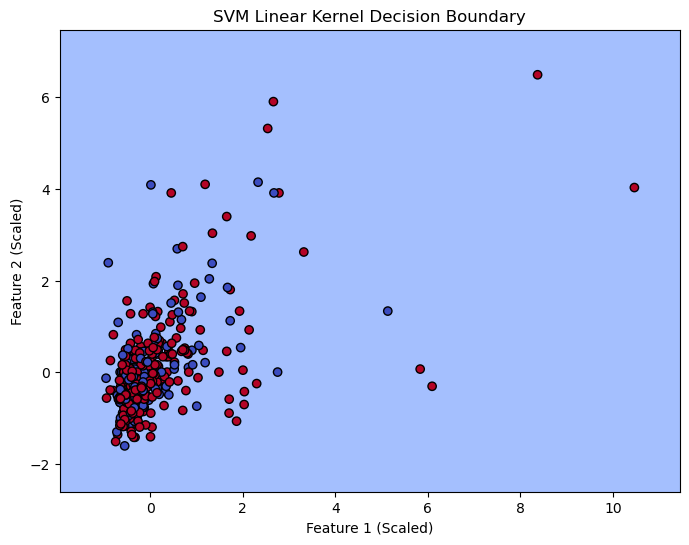

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Note: For visualization, we use only the first two features of X_train_scaled
# If you want to see all features, you'd need PCA first.
X_vis = X_train_scaled[:, :2] 
y_vis = y_train

# Re-fit the model on just these 2 features for plotting
svm_plot = SVC(kernel='linear', C=1)
svm_plot.fit(X_vis, y_vis)

# Create a mesh grid to plot in
h = .02  # step size in the mesh
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict across the entire mesh grid
Z = svm_plot.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and margins
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot the training points
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_vis, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.title('SVM Linear Kernel Decision Boundary')
plt.show()

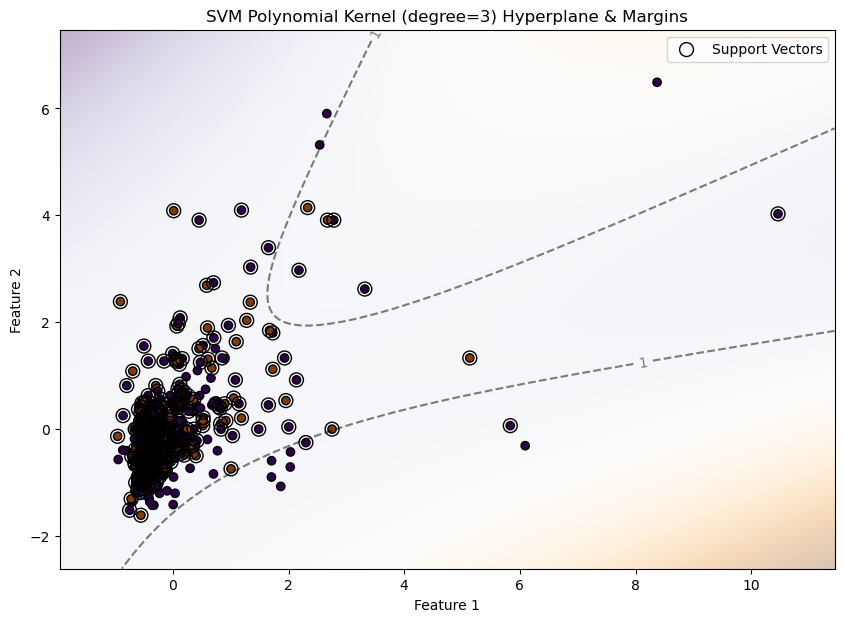

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# 1. Prepare data (using first 2 features for visualization)
X_vis = X_train_scaled[:, :2]
y_vis = y_train

# 2. Fit the Polynomial Model
svm_poly_plot = SVC(kernel='poly', degree=3, C=1)
svm_poly_plot.fit(X_vis, y_vis)

# 3. Create a mesh grid
h = .02
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# 4. Calculate the Decision Function (the hyperplane distance)
# This gives the distance of each point from the decision boundary
Z = svm_poly_plot.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 5. Plotting
plt.figure(figsize=(10, 7))

# Plot the decision boundary and margins
# levels=[0] is the hyperplane; levels=[-1, 1] are the margins
contour = plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])
plt.clabel(contour, inline=True, fontsize=10) # Label the lines

# Color the regions
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
           origin='lower', cmap=plt.cm.PuOr_r, alpha=0.3)

# Plot the training points
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_vis, cmap=plt.cm.PuOr, edgecolors='k')

# Circle the Support Vectors
plt.scatter(svm_poly_plot.support_vectors_[:, 0], svm_poly_plot.support_vectors_[:, 1], 
            s=100, facecolors='none', edgecolors='k', label='Support Vectors')

plt.title(f'SVM Polynomial Kernel (degree=3) Hyperplane & Margins')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

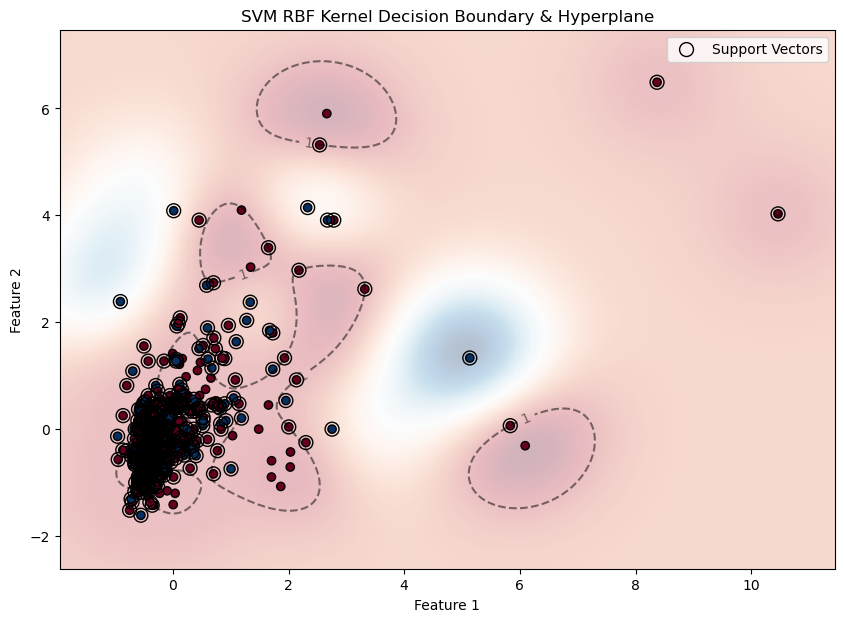

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# 1. Prepare data (using first 2 features)
X_vis = X_train_scaled[:, :2]
y_vis = y_train

# 2. Fit the RBF Model
# gamma='scale' (default) or 'auto' controls how 'tight' the boundary is
svm_rbf_plot = SVC(kernel='rbf', C=1, gamma='scale')
svm_rbf_plot.fit(X_vis, y_vis)

# 3. Create a mesh grid
h = .02
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# 4. Calculate Decision Function for the Hyperplane and Margins
Z = svm_rbf_plot.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 5. Plotting
plt.figure(figsize=(10, 7))

# Plot the decision boundary (0) and margins (-1, 1)
contour = plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])
plt.clabel(contour, inline=True, fontsize=10)

# Color the regions based on the distance from the boundary
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
           origin='lower', cmap=plt.cm.RdBu_r, alpha=0.3)

# Plot the training points
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_vis, cmap=plt.cm.RdBu_r, edgecolors='k')

# Circle the Support Vectors
plt.scatter(svm_rbf_plot.support_vectors_[:, 0], svm_rbf_plot.support_vectors_[:, 1], 
            s=100, facecolors='none', edgecolors='k', label='Support Vectors')

plt.title('SVM RBF Kernel Decision Boundary & Hyperplane')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()